In [1]:
pip install opencv-python


In [2]:
import cv2
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load YOLO
net = cv2.dnn.readNet("/content/drive/MyDrive/datasets/yolov3.weights", "/content/drive/MyDrive/datasets/yolov3.cfg")

In [5]:
# Load COCO names
with open("/content/drive/MyDrive/datasets/coco.names", "r") as f:
    classes = [line.strip() for line in f]

In [6]:
layer_names = net.getUnconnectedOutLayersNames()

In [18]:
# Function to perform object detection
def detect_objects(image):
    height, width, _ = image.shape

    # Create blob from input image
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    # Set input blob
    net.setInput(blob)

    # Forward pass
    outs = net.forward(layer_names)

    # Post-process the outputs
    class_ids, confidences, boxes = [], [], []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = (np.array(detection[0:4]) * np.array([width, height, width, height])).astype('int')
                x, y = int(center_x - w/2), int(center_y - h/2)
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-max suppression to eliminate duplicate and low-confidence detections
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels
    for i in indices:
        i = int(i)  # Ensure that i is an integer
        box = boxes[i]
        x, y, w, h = box
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image


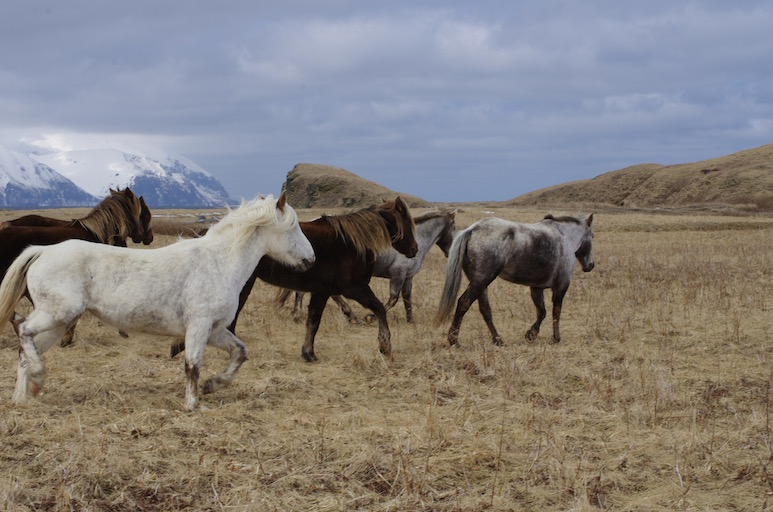

In [26]:
image = cv2.imread("/content/drive/MyDrive/datasets/horses.jpg")
# Display the original image
from google.colab.patches import cv2_imshow
cv2_imshow(image)

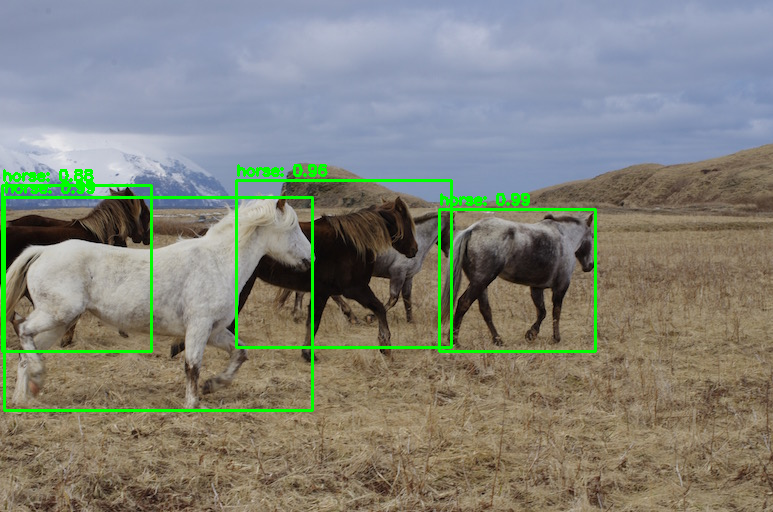

In [27]:
# # Display the original image
# from google.colab.patches import cv2_imshow
# cv2_imshow(image)

# Perform object detection
result = detect_objects(image)

# Display the result
cv2_imshow(result)
